## RETAIL ANALYSIS WITH WALMART DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#changing the data type of the ‘Date’ column because it is an object type
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipykernel_297/601733599.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

**Basic Statistics tasks**

**•	Which store has maximum sales**

In [7]:
total_sales=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [8]:
pd.DataFrame(total_sales).head()

,Weekly_Sales
Store,
20,301397792.0
4,299543953.0
14,288999911.0
13,286517704.0
2,275382441.0


store 20 has maximum sales with weekly sales 301397792.0

**•	Which store has maximum standard deviation i.e., the sales vary a lot.
Also, find out the coefficient of mean to standard deviation**

In [9]:
df_std=df.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)

In [10]:
pd.DataFrame(df_std).head()

,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0
4,266201.0
13,265507.0


Store 14 has maximum Standard Deviation of 317570.0

In [11]:
#Coefficient of mean to standard deviation

In [12]:
store14=df[df.Store==14].Weekly_Sales

In [13]:
mean_to_stddev=store14.std()/store14.mean()*100

In [14]:
print(mean_to_stddev,'%')

15.713673600948338 %


Coefficient of mean to standard deviation is 15.71 %

**Which store/s has a good quarterly growth rate in Q3’2012?**

In [15]:
#Finding the Q2 sales then Q3 sales,then taking out the difference to get the growth rate.

In [16]:
q2_sales=df[(df['Date']>='2012-04-01') & (df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [17]:
q3_sales=df[(df['Date']>='2012-07-01') & (df['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [18]:
#Growth rate = ((present-past)/past)*100

In [19]:
df_2012=pd.DataFrame({'Q2 Sales':q2_sales,'Q3 Sales':q3_sales,'Difference':(q3_sales-q2_sales),'Growth Rate %':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by='Growth Rate %',ascending=False).head()

In [20]:
df_2012

,Q2 Sales,Q3 Sales,Difference,Growth Rate %
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.789289
7,7613594.0,7322394.0,-291200.0,-3.824738
35,10753571.0,10252123.0,-501448.0,-4.663084
26,13218290.0,12417575.0,-800715.0,-6.057629
39,20191586.0,18899955.0,-1291631.0,-6.396877


In [21]:
max_sales_2012Q3=df_2012.groupby('Store')['Growth Rate %'].sum()
max_sales_2012Q3.idxmax()

16

No store shown quaterly growth rate in Q3'2012, although store 16 has maximum growth rate as compared to others

**Some holidays have a negative impact on sales.Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.**

We have 4 Holiday Events, 

(1)  Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13,

(2)  Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13,

(3)  Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13, 

(4)  Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13.

In [22]:
#Calculating the holiday event sales of each of the events and then find the non-holiday sales.

In [23]:
#Holiday events
Super_Bowl=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
Labour_Day=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving=['2010-11-26','2011-11-25','2012-11-23','2013-11-29'] 
Christmas=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

In [24]:
Super_Bowl_Sales =round(df[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_Sales =round(df[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_Sales =round(df[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_Sales =round(df[df.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [25]:
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.99, 1039182.83, 1471273.43, 960833.11)

In [26]:
#Calculating Non-holiday Sales and Comparision

In [27]:
non_holiday_sales=round(df[df['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)
non_holiday_sales

1041256.38

In [28]:
 pd.DataFrame([{'Super Bowl Sales':Super_Bowl_Sales,'Labour day Sales':Labour_Day_Sales,'Thanksgiving Sales':Thanksgiving_Sales,'Christmas Sales':Christmas_Sales,'non holiday Sales':non_holiday_sales}]).T

,0
Super Bowl Sales,1079127.99
Labour day Sales,1039182.83
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
non holiday Sales,1041256.38


Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38)

**•	Provide a monthly and semester view of sales in units and give insights**

Plotting a month-wise bar graph for weekly sales to get an idea about which month has the maximum sales, then will plot the semester-wise bar graph for weekly sales to get some insights about the semester's weekly sales.

In [29]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

Text(0.5, 1.0, 'Monthwise Sales')

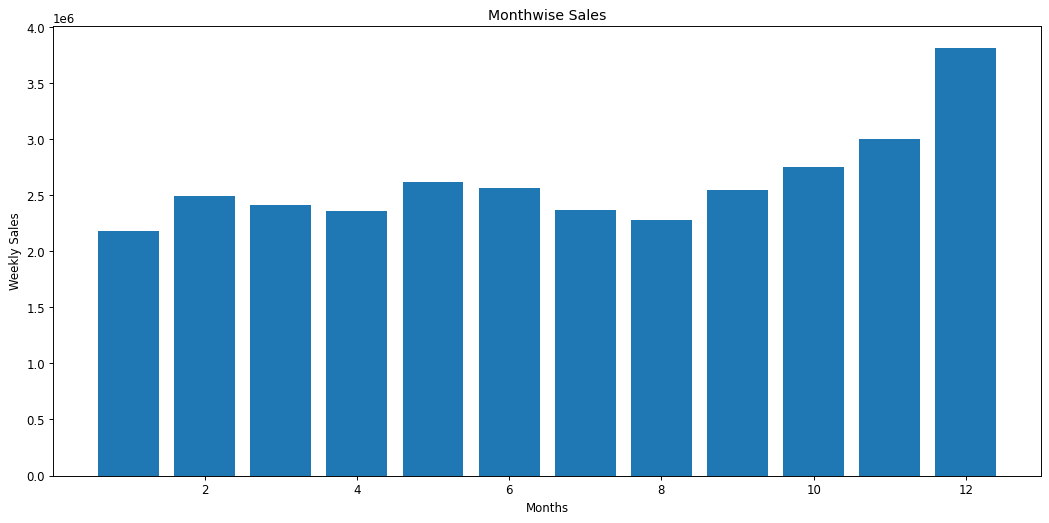

In [30]:
plt.figure(figsize=(15,7), dpi=85)
plt.bar(df['month'],df['Weekly_Sales'])
plt.xlabel('Months') 
plt.ylabel('Weekly Sales')
plt.title('Monthwise Sales')

In [31]:
#Semesterwise Sales
df['semester'] = np.where(df['month']< 7, 1, 2)

In [32]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,3,2
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,19,1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,26,1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,4,1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,2010,9,4,2


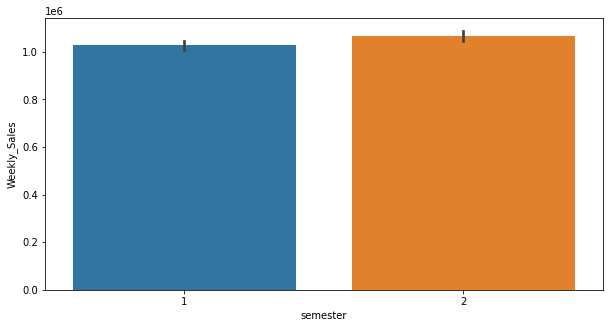

In [33]:
plt.figure(figsize =(10,5))
semester=sns.barplot(x='semester',y='Weekly_Sales',data=df)

Insights drawn-

(1)December month has the highest weekly sales. 

(2) Semester 2 has the highest weekly sales.

### Statistical Model

Model Building-

First, define dependent and independent variables. Here, store, fuel price, CPI, unemployment, day, month, and year are the independent variables and weekly sales is the dependent variable. Now, it’s time to train the model. Import train_test_spit from sklearn.model_selection and train 80% of the data and test on the rest 20% of the data.

In [34]:
#Define independent and dependent variable
# Select features and target 
x=df[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
y=df['Weekly_Sales']

In [35]:
from sklearn.model_selection import train_test_split
# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [38]:
# Linear Regression model
print('Linear Regression:')
print()

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print('Accuracy:',reg.score(x_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Linear Regression:

Accuracy: 14.454824024262736
Mean Absolute Error: 434376.40881607507
Mean Squared Error: 278133286094.229
Root Mean Squared Error: 527383.4336554657


In [39]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest Regressor:

Accuracy: 93.28819973374563
Mean Absolute Error: 82418.58630269894
Mean Squared Error: 21828686033.791904
Root Mean Squared Error: 147745.34183449543


Here, we have used 2 different algorithms to know which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives an accuracy of almost 91%. so, it is the best model to forecast weekly sales.

**Change dates into days by creating new variable.**

In [40]:
df['day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1


In [41]:
experiment_day_start=5
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['exp_day'] = (df['Date']-df['Date'].min()).dt.days + experiment_day_start

In [42]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1,118


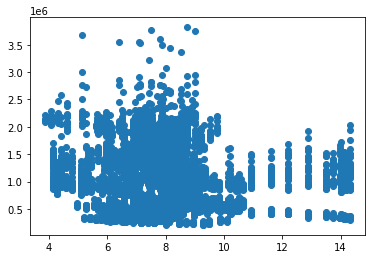

-0.10617608965795412


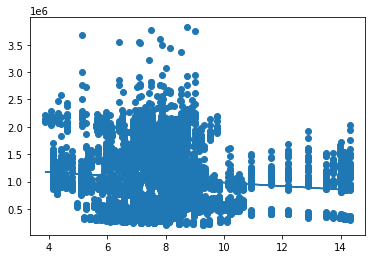

In [43]:
from sklearn.linear_model import LinearRegression
from scipy import stats
#Weekly sales vs Unemployment
x = df['Unemployment']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

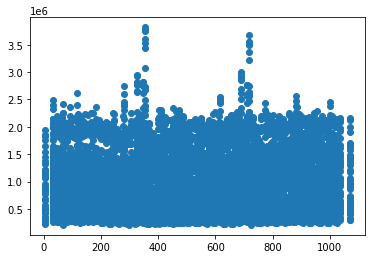

0.004591803306455429


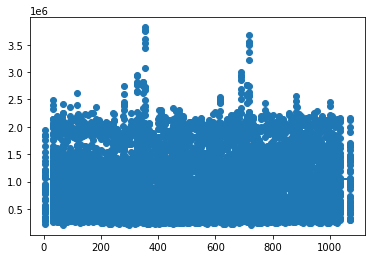

In [44]:
# Weekly_Sales vs exp_day
x = df['exp_day']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

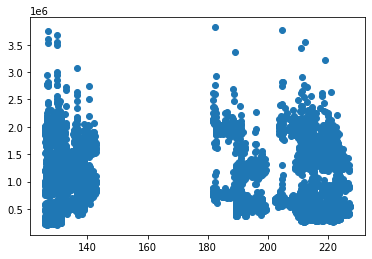

-0.07263416204017624


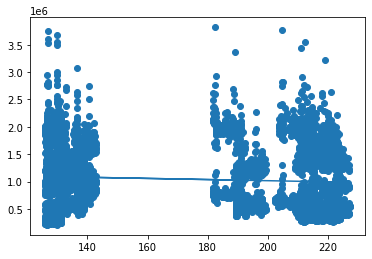

In [45]:
#Weekly sales vs CPI
x = df['CPI']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

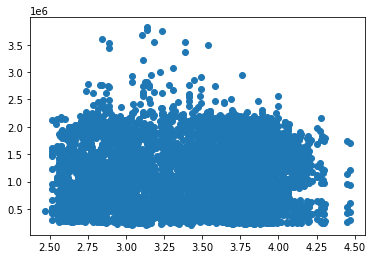

0.009463786314475135


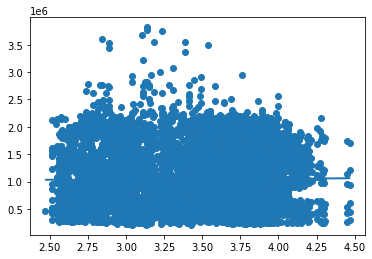

In [46]:
#Weekly sales vs Fuel price
x = df['Fuel_Price']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

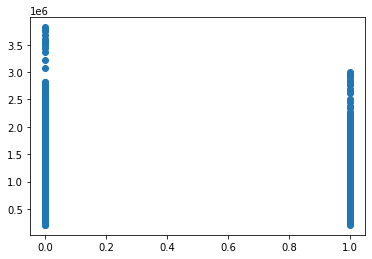

0.03689096801041455


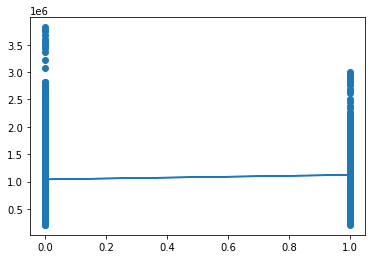

In [47]:
#Weekly sales vs Holidays
x = df['Holiday_Flag']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

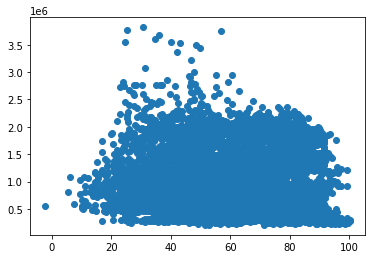

-0.06381001317946958


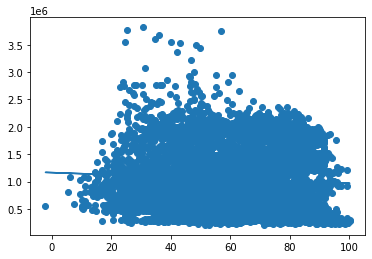

In [48]:
#Weekly sales vs Temperature
x = df['Temperature']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()